## Data Exploration:

In de Data Exploration fase controleert de code de vorm van de datasets, de kolomnamen en gegevenstypen en de eerste paar rijen van de gegevens. Het controleert ook op ontbrekende waarden en duplicaten in de gegevens.

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
amsterdam_weekdays = pd.read_csv("/home/18019234/notebooks/amsterdam_weekdays.csv")
amsterdam_weekends = pd.read_csv("/home/18019234/notebooks/amsterdam_weekends.csv")

In [16]:
# Data Exploration
# Check the shape of the datasets
print("Amsterdam Weekdays Dataset Shape: ", amsterdam_weekdays.shape)
print("Amsterdam Weekends Dataset Shape: ", amsterdam_weekends.shape)

# Check the column names and their data types
print("Amsterdam Weekdays Dataset Column Names and Data Types: ")
print(amsterdam_weekdays.dtypes)
print("Amsterdam Weekends Dataset Column Names and Data Types: ")
print(amsterdam_weekends.dtypes)

# Check the first few rows of the datasets
print("Amsterdam Weekdays Dataset First 5 Rows: ")
print(amsterdam_weekdays.head())
print("Amsterdam Weekends Dataset First 5 Rows: ")
print(amsterdam_weekends.head())

# Check for missing values
print("Amsterdam Weekdays Dataset Missing Values: ")
print(amsterdam_weekdays.isnull().sum())
print("Amsterdam Weekends Dataset Missing Values: ")
print(amsterdam_weekends.isnull().sum())

# Check for duplicates
print("Amsterdam Weekdays Dataset Duplicates: ", amsterdam_weekdays.duplicated().sum())
print("Amsterdam Weekends Dataset Duplicates: ", amsterdam_weekends.duplicated().sum())



Amsterdam Weekdays Dataset Shape:  (1103, 20)
Amsterdam Weekends Dataset Shape:  (977, 20)
Amsterdam Weekdays Dataset Column Names and Data Types: 
Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object
Amsterdam Weekends Dataset Column Names and Data Types: 
Unnamed: 0           

## Data Cleansing:
    
In de Data Cleansing fase dropt de code duplicaten en vult het ontbrekende waarden in met de mediane waarde van de kolom.

In [17]:
# Data Cleansing
# Drop the duplicate rows
amsterdam_weekdays.drop_duplicates(inplace=True)
amsterdam_weekends.drop_duplicates(inplace=True)

# Fill the missing values with the median value
amsterdam_weekdays.fillna(amsterdam_weekdays.median(), inplace=True)
amsterdam_weekends.fillna(amsterdam_weekends.median(), inplace=True)




/tmp/ipykernel_30301/4158521946.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  amsterdam_weekdays.fillna(amsterdam_weekdays.median(), inplace=True)
/tmp/ipykernel_30301/4158521946.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  amsterdam_weekends.fillna(amsterdam_weekends.median(), inplace=True)


## Data Preparation:
    
In de Data Preparation fase voegt de code de twee datasets samen tot één dataset en converteert het de booleaanse kolommen naar integer-kolommen.

In [18]:
#Data Preparation
# Merge the datasets into one
amsterdam = pd.concat([amsterdam_weekdays, amsterdam_weekends])

# Convert boolean columns to integers
amsterdam["room_shared"] = amsterdam["room_shared"].astype(int)
amsterdam["room_private"] = amsterdam["room_private"].astype(int)
amsterdam["host_is_superhost"] = amsterdam["host_is_superhost"].astype(int)
amsterdam["multi"] = amsterdam["multi"].astype(int)
amsterdam["biz"] = amsterdam["biz"].astype(int)





## Data Explanation:
    
In de Data Explanation fase berekent de code samenvattende statistieken voor de dataset en de correlatiematrix van de numerieke kolommen.

In [19]:
# Data Explanation
# Calculate summary statistics
print("Amsterdam Dataset Summary Statistics: ")
print(amsterdam.describe())

# Calculate correlation matrix
corr = amsterdam.corr()

Amsterdam Dataset Summary Statistics: 
        Unnamed: 0      realSum  room_shared  room_private  person_capacity  \
count  2080.000000  2080.000000  2080.000000   2080.000000      2080.000000   
mean    521.408173   573.112795     0.004808      0.453846         2.781731   
std     303.576046   430.658406     0.069187      0.497985         1.032634   
min       0.000000   128.887118     0.000000      0.000000         2.000000   
25%     259.750000   331.825745     0.000000      0.000000         2.000000   
50%     519.500000   460.244183     0.000000      0.000000         2.000000   
75%     779.250000   686.441075     0.000000      1.000000         4.000000   
max    1102.000000  8130.668104     1.000000      1.000000         6.000000   

       host_is_superhost        multi          biz  cleanliness_rating  \
count        2080.000000  2080.000000  2080.000000         2080.000000   
mean            0.284135     0.283173     0.105288            9.465865   
std             0.451110   

## Data Visualization:

In de Data Visualization fase produceert de code een heatmap van de correlatiematrix, een histogram van de targetvariabele (realSum), een boxplot van de targetvariabele (realSum) per kamer type, en een scatterplot van de targetvariabele (realSum) per afstand tot het stadscentrum. Deze visualisaties helpen de patronen in de gegevens te begrijpen en de belangrijkste factoren te identificeren die de vermeldingsprijs beïnvloeden.

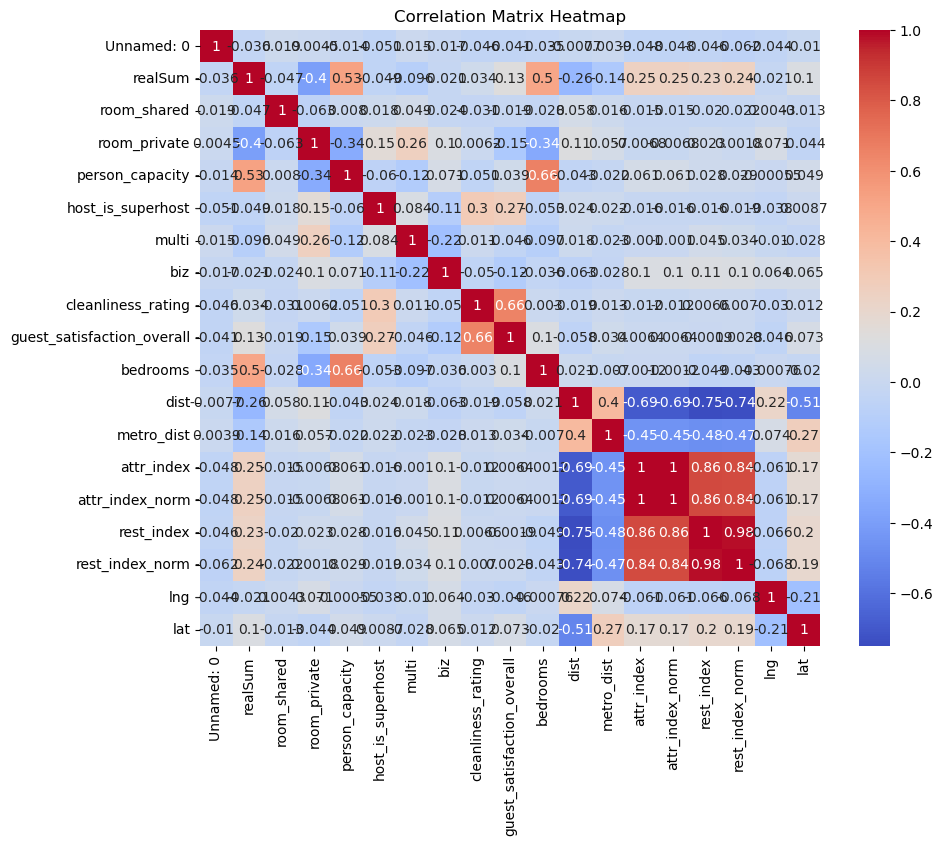

In [20]:
# Data Visualization (Exploratory)
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()



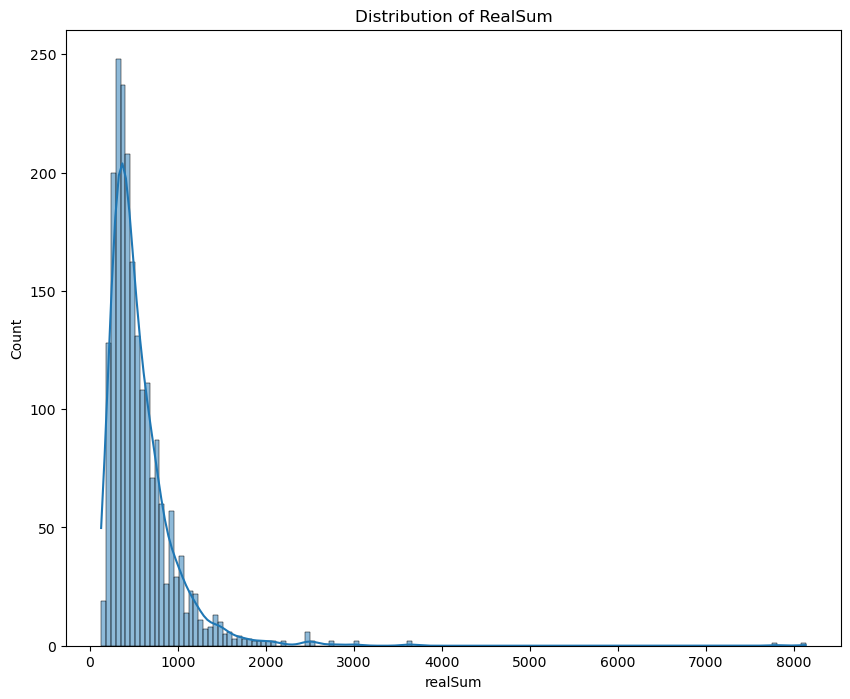

In [21]:
# Plot the distribution of the target variable (realSum)
plt.figure(figsize=(10,8))
sns.histplot(amsterdam["realSum"], kde=True)
plt.title("Distribution of RealSum")
plt.show()



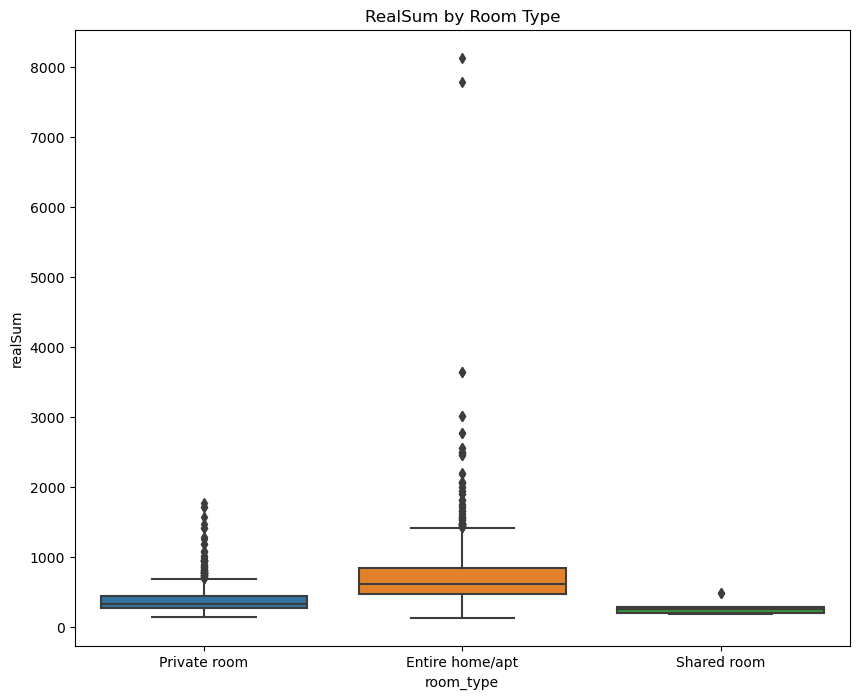

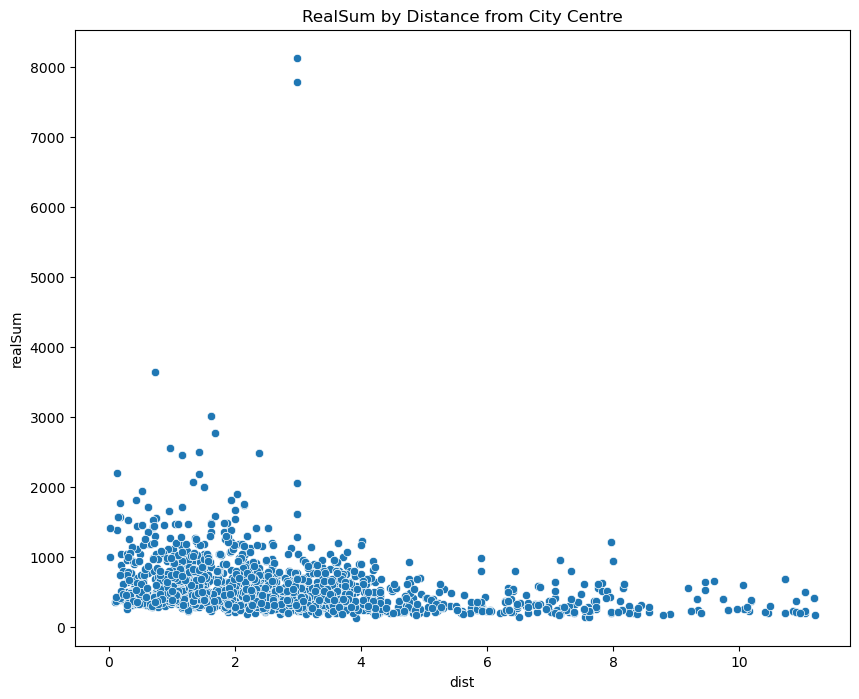

In [22]:
# Plot the boxplot of the target variable (realSum) by room type
plt.figure(figsize=(10,8))
sns.boxplot(x="room_type", y="realSum", data=amsterdam)
plt.title("RealSum by Room Type")
plt.show()

# Plot the scatterplot of the target variable (realSum) by distance from city centre
plt.figure(figsize=(10,8))
sns.scatterplot(x="dist", y="realSum", data=amsterdam)
plt.title("RealSum by Distance from City Centre")
plt.show()

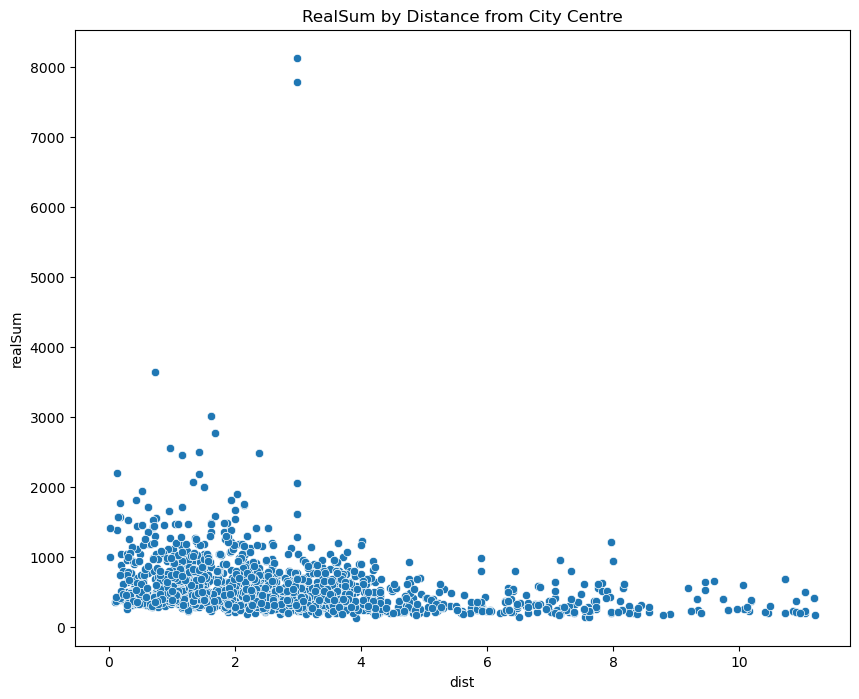

In [23]:
# Plot the scatterplot of the target variable (realSum) by distance from city centre
plt.figure(figsize=(10,8))
sns.scatterplot(x="dist", y="realSum", data=amsterdam)
plt.title("RealSum by Distance from City Centre")
plt.show()